#TITANIC Survival Report

In [84]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
from sklearn.model_selection import train_test_split,cross_val_score,ShuffleSplit
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline,make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,ConfusionMatrixDisplay
from sklearn.tree import DecisionTreeClassifier as DTC
from sklearn.impute import SimpleImputer
import warnings
warnings.filterwarnings('ignore') #Warning disable function



In [85]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [86]:
# load train dataset
Ship = pd.read_csv("/content/drive/MyDrive/Colab_data_files/titanic/train.csv")


In [87]:
Ship.head()
#First 5 rows

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [88]:
Ship.shape #Dataset total rows and columns

(891, 12)

In [89]:
Ship.columns #Total columns name of dataset


Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [90]:
Ship.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [91]:
Ship.info() #shows datatype

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [92]:
Ship.isna().sum()/len(Ship)*100

# Missing Value percentage

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

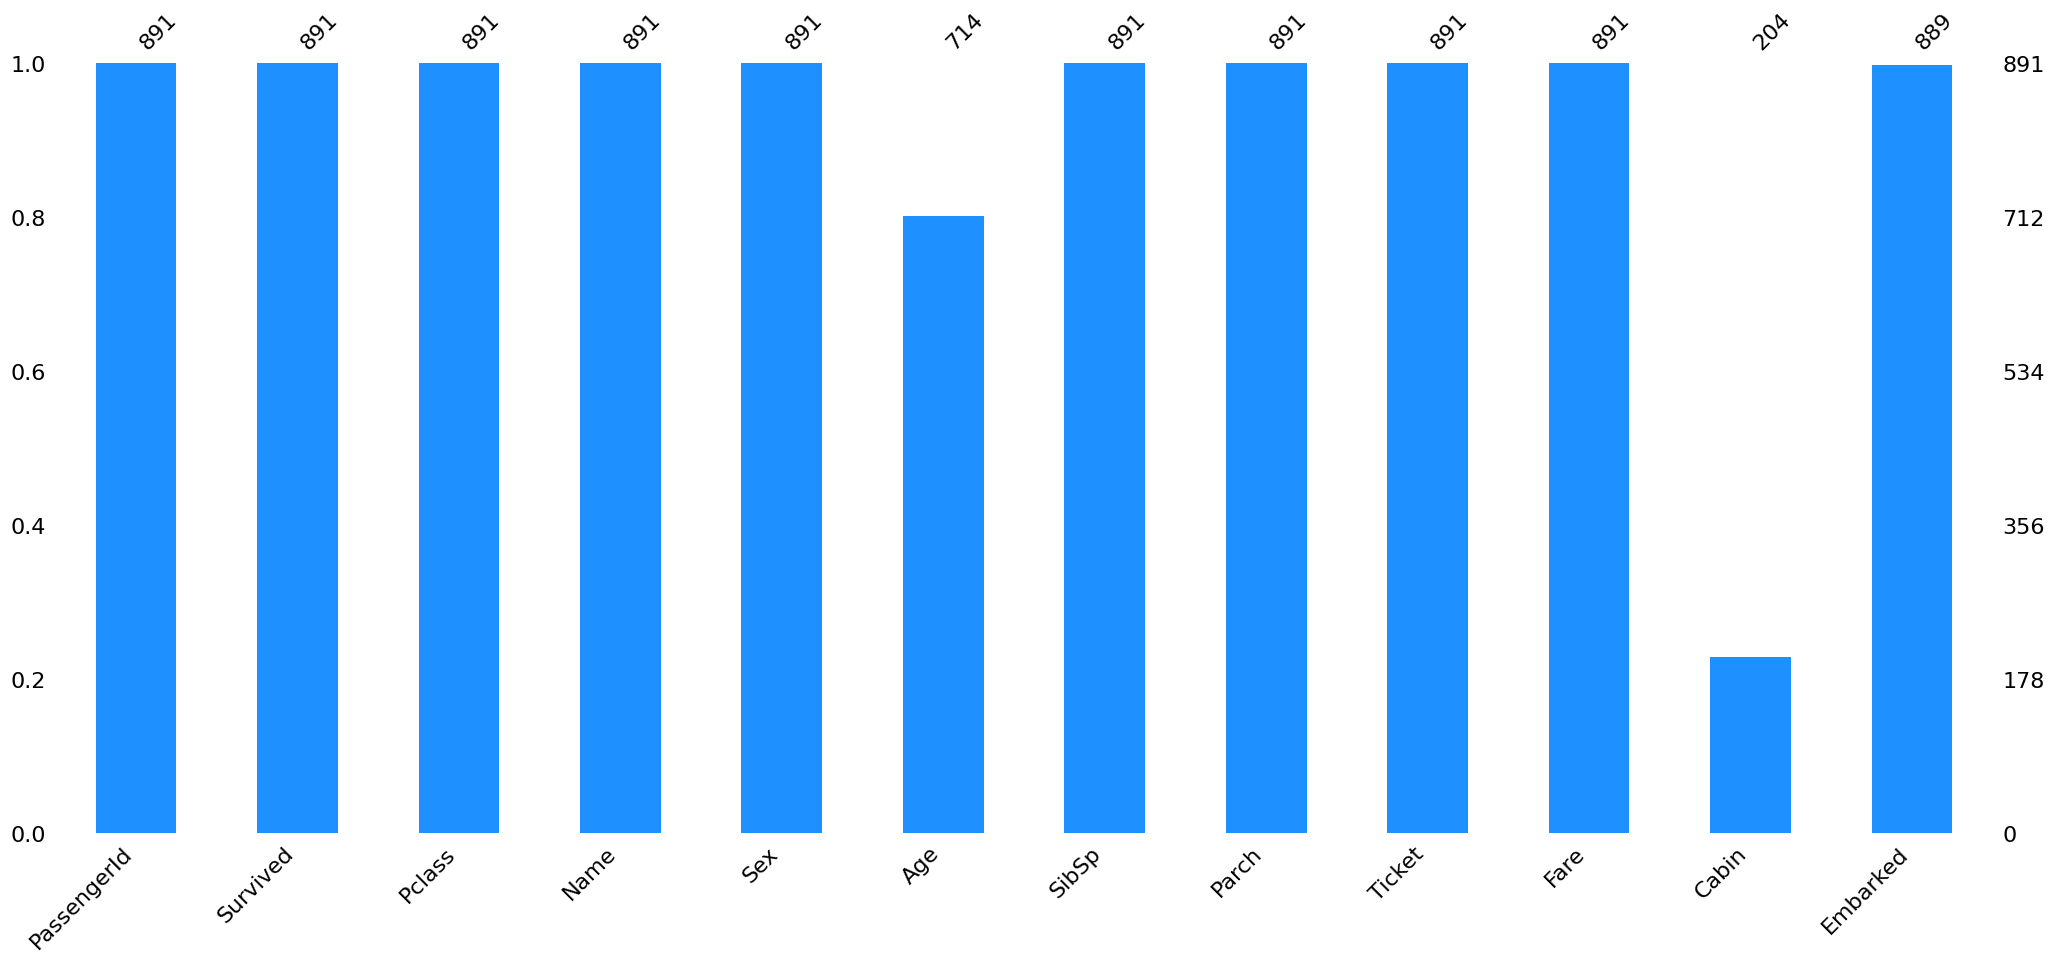

In [93]:
msno.bar(Ship, color="dodgerblue");
plt.show();

# Missing Value Visualization

In [94]:
# checking duplicated values
Ship.duplicated().sum()

0


<div style="text-align: left; background-color:#F19F9F; font-family: Trebuchet MS; color:#494545; padding: 20px; line-height:1.25;border-radius:1px; margin-bottom: 0em; text-align: center; font-size: 30px">Visualization with EDA</div>

# How many males and females were there ?

In [95]:
Ship["Sex"].value_counts()

male      577
female    314
Name: Sex, dtype: int64

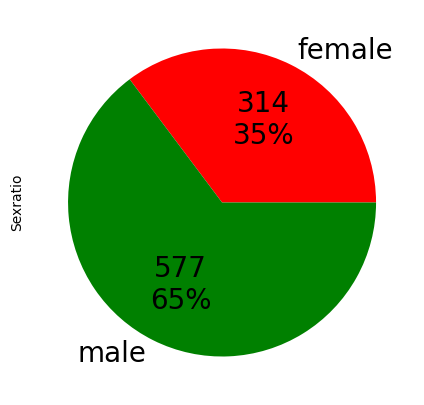

In [96]:
def label_function(val):
    return f'{val / 100 * len(Ship):.0f}\n{val:.0f}%'

fig, ax1 = plt.subplots(ncols=1, figsize=(10, 5))

Ship.groupby('Sex').size().plot(kind='pie',autopct=label_function,textprops={'fontsize': 20},
                                  colors=['r', 'g'], ax=ax1,label='Sexratio')

plt.show()


<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#5642C5;
           font-size:110%;
           font-family:Verdana;
           letter-spacing:0.5px">

<p style="padding: 10px;
              color:white;">                        
                           Observation- Males are leading compare to Female in dataset
    
</p>
</div>

 # Let's see how many passengers are Survived ?


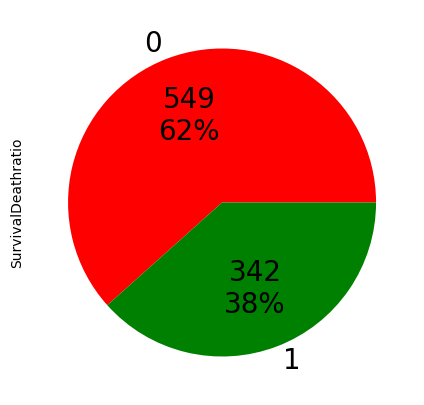

In [97]:
def label_function(val):
    return f'{val / 100 * len(Ship):.0f}\n{val:.0f}%'

fig, ax1 = plt.subplots(ncols=1, figsize=(10, 5))

Ship.groupby('Survived').size().plot(kind='pie',autopct=label_function,textprops={'fontsize': 20},
                                  colors=['r', 'g'], ax=ax1,label='SurvivalDeathratio')

plt.show()


<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#5642C5;
           font-size:110%;
           font-family:Verdana;
           letter-spacing:0.5px">

<p style="padding: 10px;
              color:white;">                        
                           Observation- Deaths percentage is @peak
    
</p>
</div>

In [98]:
Ship

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [99]:
# Let' see that 10 Passengers with Highest Fair are Survived or not.

Ship.sort_values("Fare",ascending=False)[["Name","Sex","Fare","Survived"]][:10]

,Name,Sex,Fare,Survived
258,"Ward, Miss. Anna",female,512.3292,1
737,"Lesurer, Mr. Gustave J",male,512.3292,1
679,"Cardeza, Mr. Thomas Drake Martinez",male,512.3292,1
88,"Fortune, Miss. Mabel Helen",female,263.0000,1
27,"Fortune, Mr. Charles Alexander",male,263.0000,0
341,"Fortune, Miss. Alice Elizabeth",female,263.0000,1
438,"Fortune, Mr. Mark",male,263.0000,0
311,"Ryerson, Miss. Emily Borie",female,262.3750,1
742,"Ryerson, Miss. Susan Parker ""Suzette""",female,262.3750,1
118,"Baxter, Mr. Quigg Edmond",male,247.5208,0



<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#5642C5;
           font-size:110%;
           font-family:Verdana;
           letter-spacing:0.5px">

<p style="padding: 10px;
              color:white;">                        
                           Observation- Highest Fare paid have most survivals
    
</p>
</div>

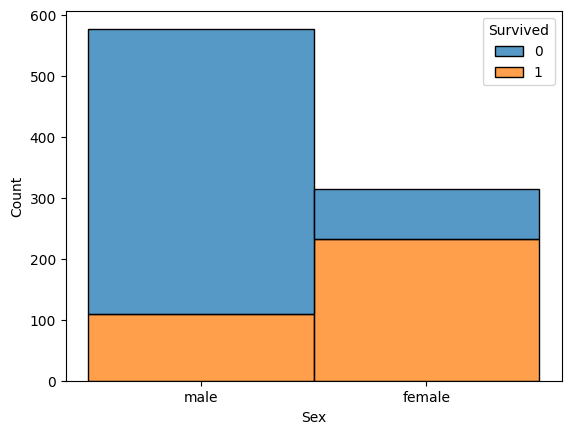

In [100]:
sns.histplot(binwidth=0.5, x="Sex", hue="Survived", data=Ship, stat="count", multiple="stack");





<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#5642C5;
           font-size:110%;
           font-family:Verdana;
           letter-spacing:0.5px">

<p style="padding: 10px;
              color:white;">                        
                           Observation- Females are holding high survivals
    
</p>
</div>

# How Age is distributed ?

<Figure size 2000x1000 with 0 Axes>

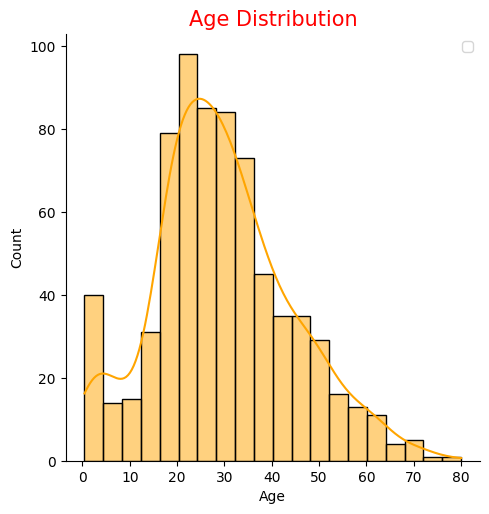

In [101]:
plt.figure(figsize=(20,10));
sns.displot(Ship['Age'],kde=True,color = 'orange');
plt.title("Age Distribution",size=15,color='red');
plt.legend();



<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#5642C5;
           font-size:110%;
           font-family:Verdana;
           letter-spacing:0.5px">

<p style="padding: 10px;
              color:white;">                        
                           Observation- Young Age people between 20 to 30 age are mostly observed    
</p>
</div>

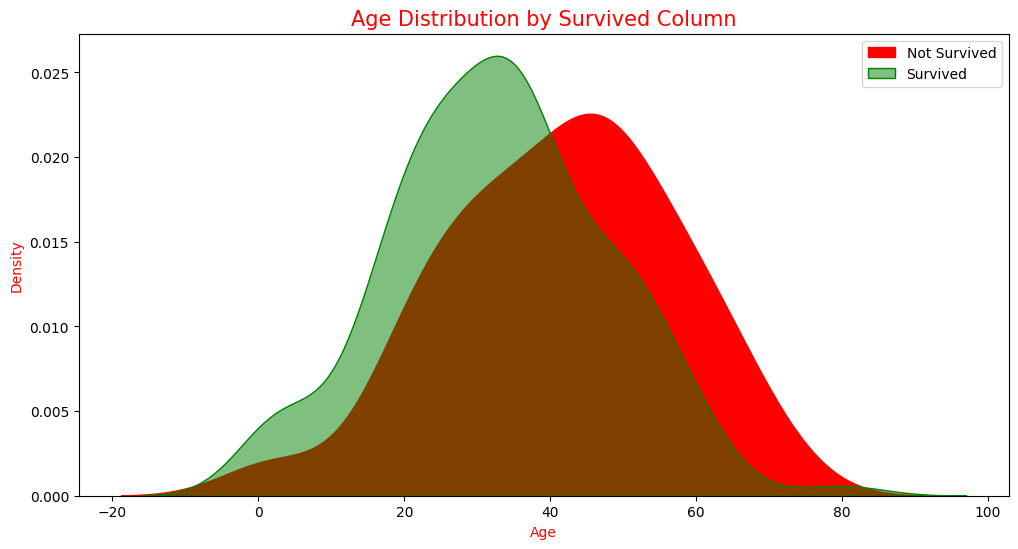

In [102]:
# Let's see Age Distribution by Survived Column
plt.figure(figsize=(12,6))
sns.kdeplot(x="Age",data=Ship[Ship['Survived']==0].dropna(),shade=True,alpha=1,color="red",label="Not Survived")
sns.kdeplot(x="Age",data=Ship[Ship['Survived']==1].dropna(),shade=True,alpha=0.5,color="green",label="Survived")
plt.title("Age Distribution by Survived Column",size=15,color='red')
plt.xlabel("Age",color='red')
plt.ylabel("Density",color='red')
plt.legend()
plt.show()


<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#5642C5;
           font-size:110%;
           font-family:Verdana;
           letter-spacing:0.5px">

<p style="padding: 10px;
              color:white;">                        
                           Observation- Senior citizens have less survival rate
</p>
</div>

# Visualize embarked column with Survived

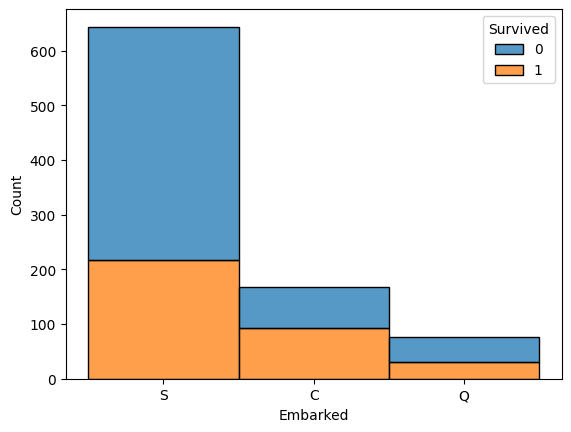

In [103]:
sns.histplot(binwidth=0.5, x="Embarked", hue="Survived", data=Ship, stat="count", multiple="stack");






<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#5642C5;
           font-size:110%;
           font-family:Verdana;
           letter-spacing:0.5px">

<p style="padding: 10px;
              color:white;">                        
                           Observation- Around 80% Passengers Mounted from S(Southampton) and survival rate is very low
</p>
</div>

# Comparing Pclass with Survival

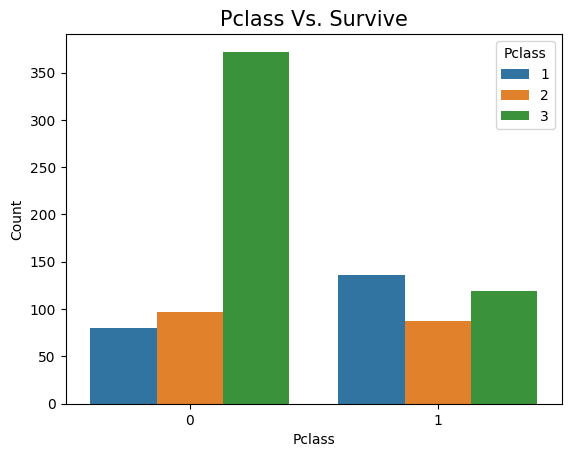

In [104]:
sns.countplot(x="Survived",data=Ship,hue="Pclass")
plt.title("Pclass Vs. Survive",size=15)
plt.xlabel("Pclass")
plt.ylabel("Count")
plt.show()


<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#5642C5;
           font-size:110%;
           font-family:Verdana;
           letter-spacing:0.5px">

<p style="padding: 10px;
              color:white;">                        
                           Observation- Class 3 citizens have less survival rate
</p>
</div>

# Age of Passengers in Every Pclass

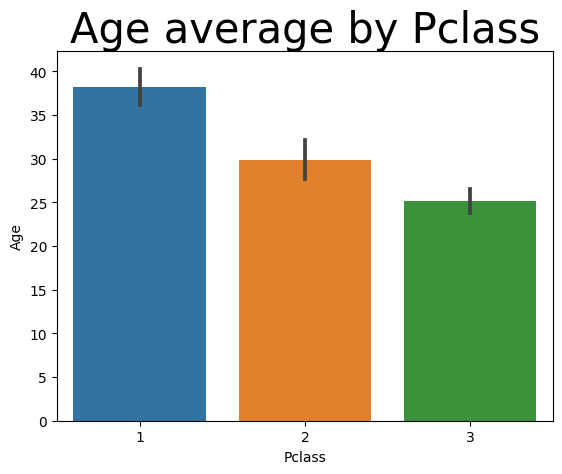

In [105]:
sns.barplot(x="Pclass",y="Age",data=Ship)
plt.title("Age average by Pclass",size=30)
plt.xlabel("Pclass")
plt.ylabel("Age")
plt.show()


<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#5642C5;
           font-size:110%;
           font-family:Verdana;
           letter-spacing:0.5px">

<p style="padding: 10px;
              color:white;">                        
                           Observation- PClass 1 Average age is around 37, PClass 2 Average age is around 30 and PClass 3 Average age is around 25.
</p>
</div>


<div style="text-align: left; background-color:#F19F9F; font-family: Trebuchet MS; color:#494545; padding: 20px; line-height:1.25;border-radius:1px; margin-bottom: 0em; text-align: center; font-size: 30px">Data Processing</div>

In [106]:
from sklearn.impute import SimpleImputer
median_imputer = SimpleImputer(missing_values=np.nan, strategy='median')
Ship['Age'] = median_imputer.fit_transform(Ship['Age'].values.reshape(-1,1))

In [107]:
# Embarked Column has Just 2 Null values, we will drop that
Ship['Embarked'].dropna(inplace=True)

In [108]:
# Removing Irrevelant Features
Ship.drop(columns=["PassengerId","Name","Ticket","Cabin"],inplace=True)

In [109]:
# Bifurcation of X and y
X = Ship.drop("Survived",axis=1)
y = Ship["Survived"]

In [110]:
# train and test split
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.8,random_state=42,stratify=y)

In [111]:
# creating a pipeline for OneHotEncoding of Categorical Columns
categorical_processor = ColumnTransformer(transformers=[
    ("OHE",OneHotEncoder(drop='first'),["Sex","Embarked"]),
],remainder="passthrough")

pipe = Pipeline(steps=[
    ("Categorical_Processor",categorical_processor),
    ("Standard Scaling",StandardScaler()),
    ("Model",DTC())

])

In [112]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('Categorical_Processor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('OHE',
                                                  OneHotEncoder(drop='first'),
                                                  ['Sex', 'Embarked'])])),
                ('Standard Scaling', StandardScaler()),
                ('Model', DecisionTreeClassifier())])

In [113]:
# Accuracy Score on test data

accuracy_score(y_test,pipe.predict(X_test))

0.8379888268156425

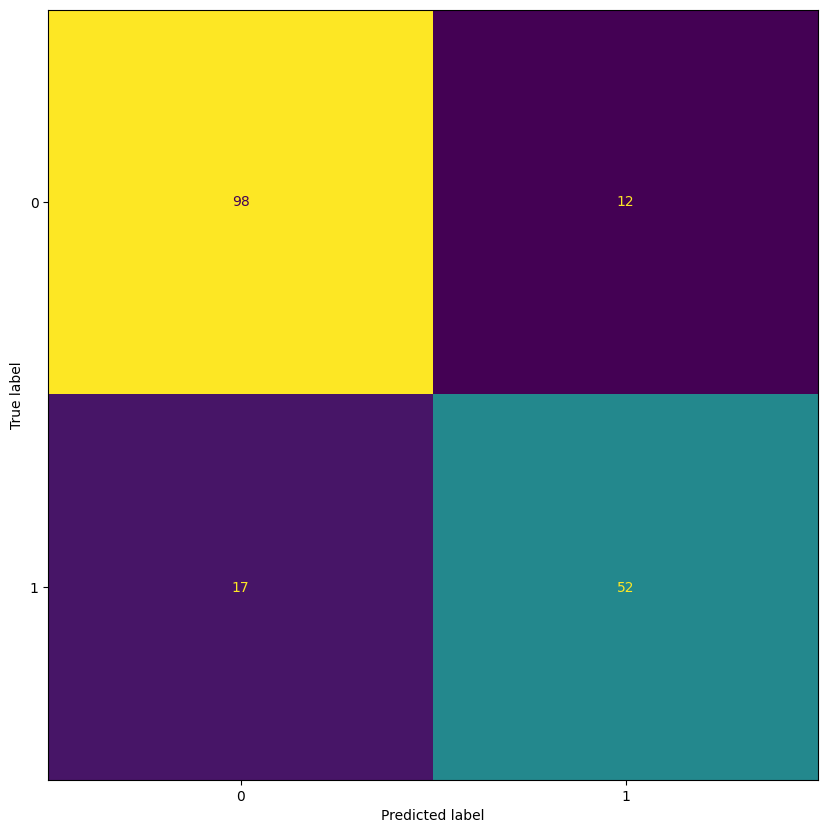

In [114]:
_= plt.figure(figsize = (10,10))
cm = confusion_matrix(y_test,pipe.predict(X_test))
ax = plt.gca()
disp = ConfusionMatrixDisplay(
                               confusion_matrix=cm,
                               display_labels=pipe.classes_
                             )

_= disp.plot(ax=ax, colorbar = False)
_= plt.show()

In [115]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

#calculating precision, recall & F1 score
precision = precision_score(y_test, pipe.predict(X_test))
recall = recall_score(y_test, pipe.predict(X_test))
F1 = f1_score(y_test, pipe.predict(X_test))

print('Precision: ',precision)
print('Recall: ',recall)
print('F1Score: ',F1)

Precision:  0.8125
Recall:  0.7536231884057971
F1Score:  0.7819548872180452


In [116]:
# I am done #